In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


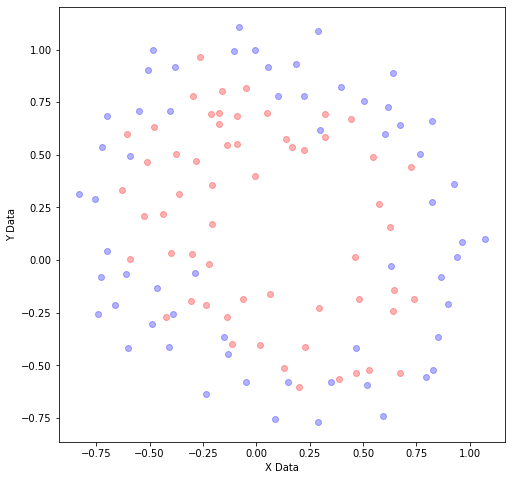

In [0]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import style
import csv
import math

data    = np.genfromtxt("/content/drive/My Drive/data-nonlinear.txt", delimiter=',')

x_data       = data[:, 0]
y_data       = data[:, 1]
label        = data[:, 2]

x_label0    = x_data[label == 0]
x_label1    = x_data[label == 1]

y_label0    = y_data[label == 0]
y_label1    = y_data[label == 1]

plt.figure(figsize=(8, 8))
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()


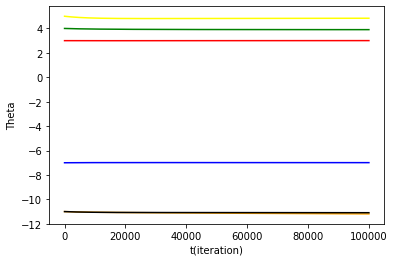

In [0]:
theta0 = float(5)
theta1 = float(3)
theta2 = float(4)
theta3 = float(-7)
theta4 = float(-11)
theta5 = float(-11)

new_theta0 = float(0)
new_theta1 = float(0)
new_theta2 = float(0)
new_theta3 = float(0)
new_theta4 = float(0)
new_theta5 = float(0)


m = float(len(x_data))

learning_rate = float(0.001)

gradient_theta0 = float(0)
gradient_theta1 = float(0)
gradient_theta2 = float(0)
gradient_theta3 = float(0)
gradient_theta4= float(0)
gradient_theta5 = float(0)


space_theta0 = []
space_theta1 = []
space_theta2 = []
space_theta3 = []
space_theta4 = []
space_theta5 = []

for i in range(100000):
  for j in range(len(x_data)):
    x = x_data[j]
    y = y_data[j]
    l = label[j]
    
    sub_func = 1 / (1 + math.exp( -1 * ( theta0 + (theta1 * x) + (theta2 * y) + (theta3 * x * y) + (theta4 * (x**2) ) + (theta5 * (y**2) ) ) ))

    gradient_theta0 += (sub_func - l) / m
    gradient_theta1 += ( (sub_func - l) * x ) / m
    gradient_theta2 += ( (sub_func - l) * y ) / m
    gradient_theta3 += ( (sub_func - l) * x * y ) / m
    gradient_theta4 += ( (sub_func - l) * (x**2) ) / m
    gradient_theta5 += ( (sub_func - l) * (y**2) ) / m

  new_theta0 = theta0 - (learning_rate * gradient_theta0)
  new_theta1 = theta1 - (learning_rate * gradient_theta1)
  new_theta2 = theta2 - (learning_rate * gradient_theta2)
  new_theta3 = theta3 - (learning_rate * gradient_theta3)
  new_theta4 = theta4 - (learning_rate * gradient_theta4)
  new_theta5 = theta5 - (learning_rate * gradient_theta5) 
  
  gradient_theta0 = float(0)
  gradient_theta1 = float(0)
  gradient_theta2 = float(0)  #초기화
  gradient_theta3 = float(0)
  gradient_theta4 = float(0)
  gradient_theta5= float(0)

  theta0 = new_theta0
  theta1 = new_theta1
  theta2 = new_theta2
  theta3 = new_theta3
  theta4 = new_theta4
  theta5 = new_theta5

  space_theta0.append(theta0)
  space_theta1.append(theta1)
  space_theta2.append(theta2)
  space_theta3.append(theta3)
  space_theta4.append(theta4)
  space_theta5.append(theta5)

#print('theta0 =', theta0)
#print('theta1 =', theta1)
#print('theta2 =', theta2)
#print('theta3 =', theta3)
#print('theta4 =', theta4)
#print('theta5 =', theta5)

x = range(100000)
y0 = space_theta0[:100000]
y1 = space_theta1[:100000]
y2 = space_theta2[:100000]
y3 = space_theta3[:100000]
y4 = space_theta4[:100000]
y5 = space_theta5[:100000]

plt.xlabel('t(iteration)')
plt.ylabel('Theta')
plt.plot(x, y0, 'yellow', x, y1, 'red', x, y2, 'green', x, y3, 'blue', x, y4, 'orange', x, y5, 'black')
plt.show()

print('g(x,y,theta) = ', theta0, '+', theta1, ' x + ', theta2, ' y + ', theta3, ' xy +', theta4, ' x^2 + ', theta5, ' y^2 ')


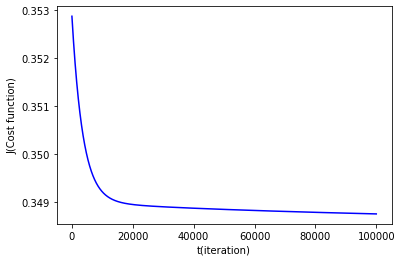

In [0]:
import math

result = float(0)
sub_func = float(0)
J = []


for i in range(len(space_theta0)):
  theta0 = space_theta0[i]
  theta1 = space_theta1[i]
  theta2 = space_theta2[i]
  theta3 = space_theta3[i]
  theta4 = space_theta4[i]
  theta5 = space_theta5[i]
  for j in range(len(x_data)):
    x = x_data[j]
    y = y_data[j]
    l = label[j]
    sub_func = 1 / (1 + math.exp( -1 * ( theta0 + (theta1 * x) + (theta2 * y) + (theta3 * x * y) + (theta4 * (x**2) + theta5 * (y**2) )) ))

    if (sub_func >= 1):
      sub_func = 0.99999

    if (sub_func == 0):
      sub_func = 0.00001

    left = float(math.log(sub_func))
    right = float(math.log(1 - sub_func))             # 바로 result에 삽입했더니 문제가 생겨서 left와 right로 쪼개서 식에 대입함.
                                                      # 세세히 확인해보니 right파트에서 sub_func이 반올림 되서 1의 값을 가지는 경우가 생기는데
                                                      # 이 값이 log (1 - right) 가 되면서 마이너스 무한대의 값을 가져서 에러가 남
                                                      # 따라서 if문을 통해서 1이 아닌 0.99999로 값을 바꿔주었음.

    result += ( (-1 * l * left) + ((l - 1) * right) ) / m
  J.append(result)
  result = float(0)


x = range(100000)
plt.xlabel('t(iteration)')
plt.ylabel('J(Cost function)')
plt.plot(x, J, 'blue')
plt.show()
